In [56]:
import requests

url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
print(response)

<Response [200]>


In [57]:
print(type(response))

<class 'requests.models.Response'>


In [58]:
print(dir(response))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
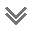

In [59]:
#extract content
print(response.content)

In [60]:
from bs4 import BeautifulSoup
help(BeautifulSoup)

Help on class BeautifulSoup in module bs4:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(na

In [61]:
soup = BeautifulSoup(response.content, "html.parser")

In [62]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [63]:
print(soup.prettify()[:5000])

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x

In [64]:
# extract title
title_text = soup.select("title")
print(title_text)

[<title>COVID - Coronavirus Statistics - Worldometer</title>]


In [65]:
type(title_text[0])

bs4.element.Tag

In [66]:
# extract text from tag
title_text[0].getText()

'COVID - Coronavirus Statistics - Worldometer'

In [67]:
world_data = soup.find("tbody").find_all("tr")
# print(world_data)

In [68]:
type(world_data)

bs4.element.ResultSet

In [69]:
for data in world_data:
    print(data)
    break

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>127,417,078</td>
<td></td>
<td>1,641,349</td>
<td></td>
<td>123,294,752</td>
<td></td>
<td>2,480,977</td>
<td>6,063</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>


In [70]:
world_data[8:]

[<tr style="">
 <td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">107,708,996</td>
 <td style="font-weight: bold; text-align:right;"></td>
 <td style="font-weight: bold; text-align:right;">1,171,692                                </td>
 <td style="font-weight: bold; 
                                     text-align:right;"></td>
 <td style="font-weight: bold; text-align:right">105,760,865</td>
 <td style="font-weight: bold; text-align:right;"></td>
 <td style="text-align:right;font-weight:bold;">776,439</td>
 <td style="font-weight: bold; text-align:right">897</td>
 <td style="font-weight: bold; text-align:right">321,706</td>
 <td style="font-weight: bold; text-align:right">3,500</td>
 <td style="font-weight: bold; text-align:right">1,181,238,895</td>
 <td style="font-weight: bold; text-alig

In [71]:
world_data[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">107,708,996</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,171,692                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">105,760,865</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">776,439</td>
<td style="font-weight: bold; text-align:right">897</td>
<td style="font-weight: bold; text-align:right">321,706</td>
<td style="font-weight: bold; text-align:right">3,500</td>
<td style="font-weight: bold; text-align:right">1,181,238,895</td>
<td style="font-weight: bold; text-align:right">3,528,1

In [72]:
world_data[8].find_all("td")

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>,
 <td style="font-weight: bold; text-align:right">107,708,996</td>,
 <td style="font-weight: bold; text-align:right;"></td>,
 <td style="font-weight: bold; text-align:right;">1,171,692                                </td>,
 <td style="font-weight: bold; 
                                     text-align:right;"></td>,
 <td style="font-weight: bold; text-align:right">105,760,865</td>,
 <td style="font-weight: bold; text-align:right;"></td>,
 <td style="text-align:right;font-weight:bold;">776,439</td>,
 <td style="font-weight: bold; text-align:right">897</td>,
 <td style="font-weight: bold; text-align:right">321,706</td>,
 <td style="font-weight: bold; text-align:right">3,500</td>,
 <td style="font-weight: bold; text-align:right">1,181,238,895</td>,
 <td style="font-weight: bold; text-align:

In [73]:
len(world_data)

239

In [74]:
complete_data = []

for i in range(8, len(world_data)):
    data = []
    list_data = world_data[i].find_all("td")
    # print(list_data)
    # print(len(list_data))
    # break 

    for col in list_data:
        data.append(col.getText())

    complete_data.append(data)

In [75]:
print(complete_data[:2])

[['1', 'USA', '107,708,996', '', '1,171,692                                ', '', '105,760,865', '', '776,439', '897', '321,706', '3,500', '1,181,238,895', '3,528,137', '334,805,269 ', 'North America', '3', '286', '0', '', '', '2,319'], ['2', 'India', '44,996,151', '', '531,920                                ', '', '44,462,726', '', '1,505', 'N/A', '31,989', '378', '930,797,975', '661,721', '1,406,631,776 ', 'Asia', '31', '2,644', '2', '', '', '1']]


In [76]:
print(complete_data[0][12])

1,181,238,895


In [77]:
complete_data[0][1:10] + [complete_data[0][12]] + [complete_data[0][14]]

['USA',
 '107,708,996',
 '',
 '1,171,692                                ',
 '',
 '105,760,865',
 '',
 '776,439',
 '897',
 '1,181,238,895',
 '334,805,269 ']

In [78]:
print(complete_data[:2])

[['1', 'USA', '107,708,996', '', '1,171,692                                ', '', '105,760,865', '', '776,439', '897', '321,706', '3,500', '1,181,238,895', '3,528,137', '334,805,269 ', 'North America', '3', '286', '0', '', '', '2,319'], ['2', 'India', '44,996,151', '', '531,920                                ', '', '44,462,726', '', '1,505', 'N/A', '31,989', '378', '930,797,975', '661,721', '1,406,631,776 ', 'Asia', '31', '2,644', '2', '', '', '1']]


In [79]:
cleaned_data = list(map(lambda x: x[1:10] + [x[12]] + [x[14]], complete_data))
len(cleaned_data)

231

In [80]:
# Define Column names 
column_names = [
    "names",
    "total_cases",
    "new_cases",
    "total_deaths",
    "new_deaths",
    "total_recovered",
    "new_recovered",
    "active_cases",
    "serious_cases",
    "total_tests",
    "population"
]

In [81]:
import pandas as pd
list_2d = [[1,2], [3,4]]
pd.DataFrame(list_2d)

,0,1
0,1,2
1,3,4


In [82]:
df = pd.DataFrame(cleaned_data, columns = column_names)
print(df)

              names  total_cases new_cases  \
0               USA  107,708,996             
1             India   44,996,151             
2            France   40,138,560             
3           Germany   38,428,685             
4            Brazil   37,739,057             
..              ...          ...       ...   
226         Tokelau           80             
227    Vatican City           29             
228  Western Sahara           10             
229      MS Zaandam            9             
230           China      503,302             

                                  total_deaths new_deaths total_recovered  \
0    1,171,692                                                105,760,865   
1      531,920                                                 44,462,726   
2      167,642                                                 39,970,918   
3      174,352                                                 38,240,600   
4      704,897                                                

In [83]:
df .head()

,names,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_cases,total_tests,population
0,USA,"107,708,996",,"1,171,692",,"105,760,865",,"776,439",897,"1,181,238,895","334,805,269"
1,India,"44,996,151",,"531,920",,"44,462,726",,"1,505",N/A,"930,797,975","1,406,631,776"
2,France,"40,138,560",,"167,642",,"39,970,918",,0,869,"271,490,188","65,584,518"
3,Germany,"38,428,685",,"174,352",,"38,240,600",,"13,733",N/A,"122,332,384","83,883,596"
4,Brazil,"37,739,057",,"704,897",,"36,249,161",,"784,999",N/A,"63,776,166","215,353,593"


In [84]:
df.tail()

,names,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_cases,total_tests,population
226,Tokelau,80,,,,,,80,,,"1,378"
227,Vatican City,29,,,,29,,0,,,799
228,Western Sahara,10,,1,,9,,0,,,"626,161"
229,MS Zaandam,9,,2,,7,,0,,,
230,China,"503,302",,"5,272",,"379,053",,"118,977",N/A,"160,000,000","1,448,471,400"


In [85]:
df_read= pd.read_csv("covid_data.csv")
df_read.head()

,names,total_cases,new_cases,total_deaths,new_deaths,total_recovered,new_recovered,active_cases,serious_cases,total_tests,population
0,USA,"107,583,087",NaN,"1,170,864",NaN,"105,699,264",NaN,"712,959",709.0,"1,181,214,584","334,805,269"
1,India,"44,996,112",NaN,"531,918",NaN,"44,462,655",NaN,"1,539",NaN,"930,797,975","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869.0,"271,490,188","65,584,518"
3,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,"122,332,384","83,883,596"
4,Brazil,"37,739,057",NaN,"704,897",NaN,"36,249,161",NaN,"784,999",NaN,"63,776,166","215,353,593"


In [86]:
df_read.isnull().sum()

names                0
total_cases          0
new_cases          231
total_deaths         0
new_deaths         231
total_recovered     22
new_recovered      225
active_cases        20
serious_cases      110
total_tests         18
population           0
dtype: int64

In [87]:
missing_data = df_read.isnull().sum()
missing_data

names                0
total_cases          0
new_cases          231
total_deaths         0
new_deaths         231
total_recovered     22
new_recovered      225
active_cases        20
serious_cases      110
total_tests         18
population           0
dtype: int64

In [88]:
type(missing_data)

pandas.core.series.Series

In [89]:
df_read.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
names,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new_cases,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total_deaths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new_deaths,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total_recovered,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
new_recovered,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
active_cases,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
serious_cases,False,True,False,True,True,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
total_tests,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,True,True,False


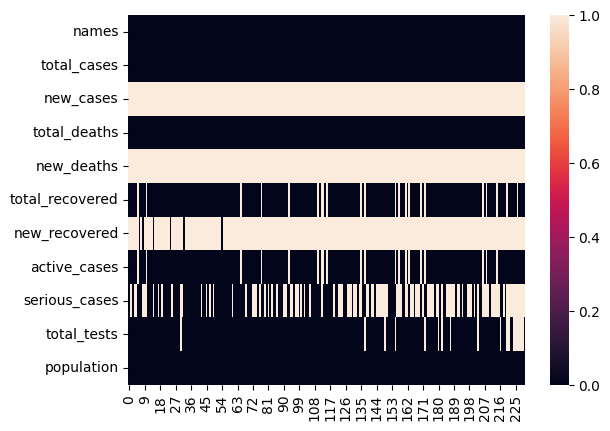

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_read.isnull().T)
plt.show()

<Axes: >

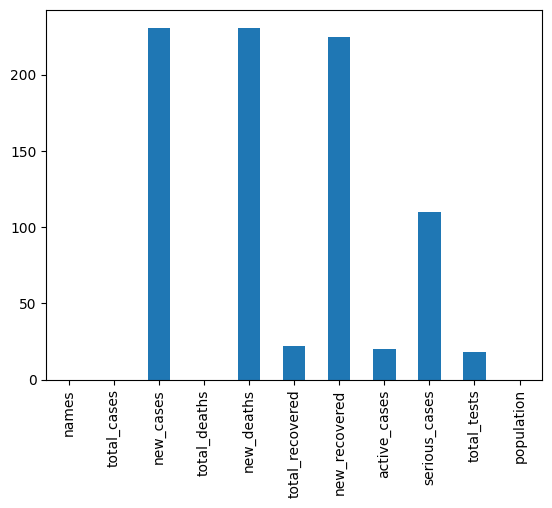

In [91]:
# Bar Graph 

missing_data.plot(kind="bar")

Text(0, 0.5, 'Category')

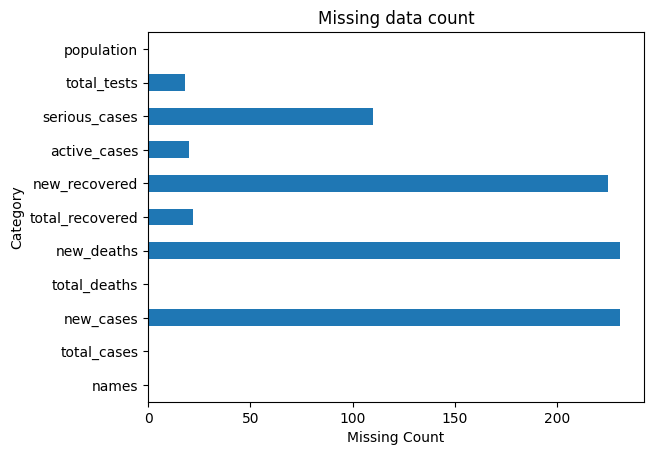

In [92]:
missing_data.plot(kind="barh")
plt.title("Missing data count")
plt.xlabel("Missing Count")
plt.ylabel("Category")


In [93]:
# extract value
missing_data.values 


array([  0,   0, 231,   0, 231,  22, 225,  20, 110,  18,   0], dtype=int64)

In [94]:
missing_data.index

Index(['names', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_recovered', 'new_recovered', 'active_cases', 'serious_cases',
       'total_tests', 'population'],
      dtype='object')

In [95]:
import plotly.express as px

px.bar( x = missing_data.index, y = missing_data.values)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['names', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                          'total_recovered', 'new_recovered', 'active_cases', 'serious_cases',
                          'total_tests', 'population'], dtype=object),
              'xaxis': 'x',
              'y': array([  0,   0, 231,   0, 231,  22, 225,  20, 110,  18,   0], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [ ]:
# pie_chart
px.pie( values= missing_data.values, names= missing_data.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['names', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                               'total_recovered', 'new_recovered', 'active_cases', 'serious_cases',
                               'total_tests', 'population'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([  0,   0, 231,   0, 231,  22, 225,  20, 110,  18,   0], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

Insight
names column has no any missing values
new deaths has most of missing values


In [ ]:
df_read.dtypes

names               object
total_cases         object
new_cases          float64
total_deaths        object
new_deaths         float64
total_recovered     object
new_recovered       object
active_cases        object
serious_cases      float64
total_tests         object
population          object
dtype: object

In [ ]:
int("13,35".replace(",",""))

1335

In [ ]:
x = df_read["names"]

# Data preparation: Typecast column total_cases from object to int

y = df_read["total_cases"].map(lambda x: int(x.replace(",", "")))

In [ ]:
px.bar(x = x, y= y)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['USA', 'India', 'France', ..., 'Western Sahara', 'MS Zaandam', 'China'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([107583087,  44996112,  40138560, ...,        10,         9,    503302],
                         dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})